# Data Science Course Week 2 - Lesson 2 
# Introduction to Linear Regression


Regression is the process of learning a mapping from a vector of input data to a quantitative output given a set of observations. For example, coordinates in a room to Wi-Fi signal strength, someone's Body Mass Index to their life expectancy or a stock's performance over the last 5 days to it's value tomorrow.

There are numerous methods for addressing this problem, each with their own set of assumptions and behaviour. Some are ideal for tackling large volumes of data while others provide more informative probabilistic outputs.

In this lab, we'll focus on Linear Regression; a good point of reference for many other regression techniques and still used widely around the world today due to their simplicity and favourable scaling characteristics.

We will be using [statsmodels](http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/ols.html) for learning about linear regression. It covers the models better than in scikit when we are learning and want more insights into the model parameters. But we will mainly be using scikit learn for the rest of the course. 

# Class Workshop

In [1]:
# Import the libraries required
import pandas as pd
import statsmodels.formula.api as smf


Here we are using a dataset of chicago house prices. The dataset is made up of houses that sold and several variables that describe the data. 

In [2]:
# Read in data
house_data = pd.read_csv("chicagohouseprices2.csv", index_col=0)

In [6]:
house_data.describe()

,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
count,2.190000e+02,70.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,2.190000e+02
mean,4.834311e+05,2.271429,4.663607,9.698630,3.420411,29.424658,873.200913,699.977169,49.197717,4.862191e+05
std,4.001249e+05,0.883364,1.418146,2.898995,0.352522,49.155880,1392.893683,1175.278922,18.554525,3.978582e+05
min,2.450000e+04,1.000000,1.090000,6.000000,2.770000,0.000000,0.000000,0.000000,16.700000,2.883650e+04
25%,3.190000e+05,2.000000,3.940000,8.000000,3.150000,0.000000,0.000000,0.000000,36.100000,3.074488e+05
50%,3.900000e+05,2.000000,4.930000,9.000000,3.400000,0.000000,0.000000,0.000000,50.000000,3.919800e+05
75%,5.125000e+05,3.000000,5.580000,10.000000,3.685000,41.000000,2614.000000,1344.000000,59.500000,5.324750e+05
max,3.686000e+06,4.000000,8.080000,22.000000,4.200000,131.000000,7405.000000,6422.000000,93.900000,3.973508e+06


In [3]:
# do we have any missing data?
house_data.isnull().sum() 

Address             0
Neighborhood        0
HouseType           3
Price               0
Bath              149
CrimeIndex          0
MinutesToLoop       0
MilesToLake         0
Age                 0
LotSizeSqft         0
HouseSizeSqft       0
SchoolIndex         0
EstimatedPrice      0
dtype: int64

In [4]:
# Summarise the data
house_data.describe()
#house_data.describe(include=['object'])
#house_data.describe(include='all')

,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
count,2.190000e+02,70.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,2.190000e+02
mean,4.834311e+05,2.271429,4.663607,9.698630,3.420411,29.424658,873.200913,699.977169,49.197717,4.862191e+05
std,4.001249e+05,0.883364,1.418146,2.898995,0.352522,49.155880,1392.893683,1175.278922,18.554525,3.978582e+05
min,2.450000e+04,1.000000,1.090000,6.000000,2.770000,0.000000,0.000000,0.000000,16.700000,2.883650e+04
25%,3.190000e+05,2.000000,3.940000,8.000000,3.150000,0.000000,0.000000,0.000000,36.100000,3.074488e+05
50%,3.900000e+05,2.000000,4.930000,9.000000,3.400000,0.000000,0.000000,0.000000,50.000000,3.919800e+05
75%,5.125000e+05,3.000000,5.580000,10.000000,3.685000,41.000000,2614.000000,1344.000000,59.500000,5.324750e+05
max,3.686000e+06,4.000000,8.080000,22.000000,4.200000,131.000000,7405.000000,6422.000000,93.900000,3.973508e+06


In [5]:
# Look for any linear correlations in the data
house_data.corr()

,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
Price,1.000000,0.113943,0.118667,-0.034644,-0.072433,0.237720,0.443341,0.456272,-0.072403,0.983784
Bath,0.113943,1.000000,0.163785,0.166330,-0.157517,-0.039220,-0.029979,0.698526,-0.047992,0.105632
CrimeIndex,0.118667,0.163785,1.000000,0.194745,0.102382,-0.036644,-0.008807,0.070952,-0.100256,0.122793
MinutesToLoop,-0.034644,0.166330,0.194745,1.000000,0.374829,-0.023820,-0.053292,-0.032437,-0.196728,-0.034185
MilesToLake,-0.072433,-0.157517,0.102382,0.374829,1.000000,-0.047087,0.006240,-0.046517,-0.205966,-0.082604
Age,0.237720,-0.039220,-0.036644,-0.023820,-0.047087,1.000000,0.716774,0.645147,-0.029953,0.255628
LotSizeSqft,0.443341,-0.029979,-0.008807,-0.053292,0.006240,0.716774,1.000000,0.828598,-0.055458,0.454939
HouseSizeSqft,0.456272,0.698526,0.070952,-0.032437,-0.046517,0.645147,0.828598,1.000000,-0.023378,0.471783
SchoolIndex,-0.072403,-0.047992,-0.100256,-0.196728,-0.205966,-0.029953,-0.055458,-0.023378,1.000000,-0.073825
EstimatedPrice,0.983784,0.105632,0.122793,-0.034185,-0.082604,0.255628,0.454939,0.471783,-0.073825,1.000000


In [6]:
# Plot each variable against each other 
# scroll down past the subplot information
pd.scatter_matrix(house_data, figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D2126BA048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002D215FB6EB8>]], dtype=object)

### Questions?

- Can you describe the data set - give a summary of what's happening?
- What looks to be affecting house prices from our initial inspection?
- What is the type of relationship in those variables affecting price?

In [21]:
# create a fitted model in one line
lm = smf.ols(formula='Price ~ Bath + HouseSizeSqft + Age + SchoolIndex', data=house_data).fit()

# print the coefficients!
lm.params

Intercept        777891.349946
Bath             -74553.160263
HouseSizeSqft       180.831003
Age               -1382.040467
SchoolIndex       -3436.889913
dtype: float64

The summary function provided by the statsmodel library presents lots of useful information about the resulting model.

Key items to pay attention to are:
- R-squared
- Adj. R-Squared
- coef (for each variable)

In [11]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.340
Date:                Thu, 01 Jun 2017   Prob (F-statistic):              0.269
Time:                        20:01:51   Log-Likelihood:                -1030.2
No. Observations:                  70   AIC:                             2066.
Df Residuals:                      67   BIC:                             2073.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      5.083e+05   2.05e+05      2.478      0.016      9.89e+04  9.18e+05
Bath            -2.9e+04   1.16e+05     -0.250      0.803     -2.61e+05  2.03e+05
HouseSizeSqft   133.0119     99.854      1.332      0.187       -66.297   332.321
==============================================================================
Omnibus:                       85.337   Durbin-Watson:                   1.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              891.863
Skew:                           3.754   Prob(JB):                    2.16e-194
Kurtosis:                      18.793   Cond. No.                     7.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# What would you expect a house price to be for a house with 3 bathrooms and 350 sqft?
# Calculate it.
508310 -28995.66*3 + 133*350

467873.02

## Student Excercise

Now try creating a regression from just the EstimatedPrice

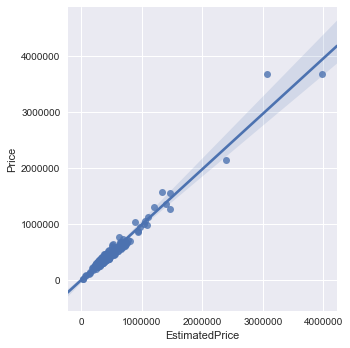

In [17]:
# check the distribution of Price vs. EstimatedPrice using a scatterplot
import seaborn as sns
sns.set_style("darkgrid")

sns.lmplot(y='Price', x='EstimatedPrice', data=house_data)

In [26]:
# Let's try just modelling just using the estimated price
# create a fitted model in one line
lm = smf.ols(formula='Price ~ EstimatedPrice ', data=house_data).fit()

# print the coefficients
lm.params

Intercept         2371.037940
EstimatedPrice       0.989389
dtype: float64

In [24]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.027
Date:                Thu, 01 Jun 2017   Prob (F-statistic):              0.400
Time:                        20:17:36   Log-Likelihood:                -1029.4
No. Observations:                  70   AIC:                             2069.
Df Residuals:                      65   BIC:                             2080.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      7.779e+05   3.17e+05      2.457      0.017      1.46e+05  1.41e+06
Bath          -7.455e+04   1.23e+05     -0.608      0.545      -3.2e+05   1.7e+05
HouseSizeSqft   180.8310    108.004      1.674      0.099       -34.867   396.529
Age           -1382.0405   1396.835     -0.989      0.326     -4171.713  1407.632
SchoolIndex   -3436.8899   4268.998     -0.805      0.424      -1.2e+04  5088.887
==============================================================================
Omnibus:                       87.696   Durbin-Watson:                   1.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              983.027
Skew:                           3.872   Prob(JB):                    3.46e-214
Kurtosis:                      19.646   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Question:
Did the model build on just Estimated Price have a better R-Squared value than the prior model built using Bath and HouseSizeSqft?

### Predicting Price using the built model


Now we will find out what the model estimates the price will be for the the minimum and maximium values of EstimatedPrice

In [22]:
# create a DataFrame with the minimum and maximum values of EstimatedPrice
# these values will be be used in the built model to predict the Price
X_new = pd.DataFrame({'EstimatedPrice': [house_data.EstimatedPrice.min(), house_data.EstimatedPrice.max()]})
X_new.head()

,EstimatedPrice
0,28836.5
1,3973508.0


In [27]:
# predict price given two data points and the built model

preds = lm.predict(X_new)
preds

array([   30901.56354902,  3933717.48261279])

Now lets view a line representing the model build off just Estimated Price, over a scatter plot of the data of Price vs. EstimatedPrice.

To produce the line overlay, we will simply plot a straight line between the two predicted points over the scatter plot. 

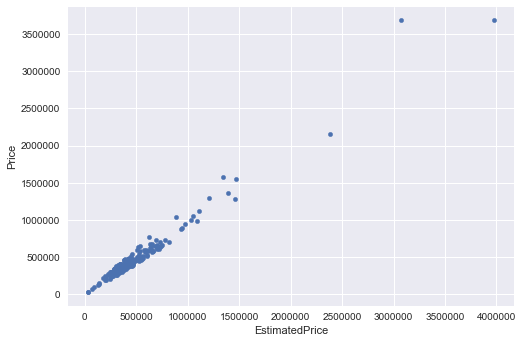

In [28]:
# first, plot the observed data
house_data.plot(kind='scatter', x='EstimatedPrice', y='Price')

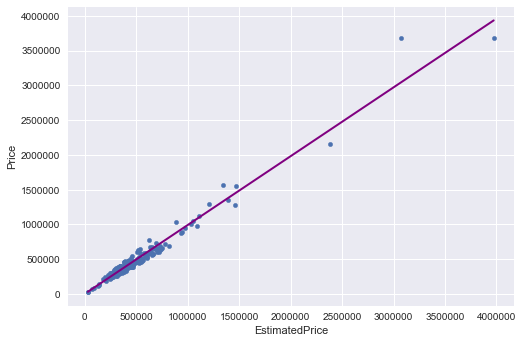

In [30]:
# Now, plot a line over the points that uses just the two points
house_data.plot(kind='scatter', x='EstimatedPrice', y='Price')
# this code overlays a straight line between the the coordinates created by X_new and preds
plt.plot(X_new, preds, c='purple', linewidth=2)

### Experiment
Now try creating new models by selecting different variables or combinations of variables. Can you get a better fit?

In [87]:
import pandas as pd
import numpy as np

house_data = pd.read_csv("chicagohouseprices2.csv", index_col=0)
house_nparray = house_data.values
type(house_nparray[0,0]),type(house_nparray[0,1]),type(house_nparray[0,2]),type(house_nparray[0,3]),type(house_nparray[0,4]),type(house_nparray[0,5]),type(house_nparray[0,6]),type(house_nparray[0,7]),type(house_nparray[0,8]),type(house_nparray[0,9]),type(house_nparray[0,10]),type(house_nparray[0,11]),type(house_nparray[0,12])

(str, str, str, int, float, float, int, float, int, int, int, float, float)

In [ ]:
house_nparray.drop[]

## Themepark 

The file **themepark.csv** has some data from a theme park. Children were asked to rate their experience on a scale
from 0-5. This data was compared against the number of hours they spent in the park.

In [ ]:
!ls 

In [ ]:
# Create a pandas DataFrame from this data by reading it in using pandas. 
# It is located in the same directory as this notebook, so you will not need to provide a filepath.

In [ ]:
# Have a look at the data (e.g. display the head or tail, use describe, etc.)

In [ ]:
# Draw a scatterplot of this data.

In [ ]:
# Try doing a linear regression on this data

In [ ]:
# Plot this regression over the top of the data. Could the regression be better?